## Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection
from sklearn import linear_model, svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('FinalData.csv')

In [3]:
Data['Test'] = Data.groupby('artist')['artist'].transform('count')
a, b = Data.Test.min(), Data.Test.max()
Data['Test'] = (Data.Test - a)/(b - a)

In [4]:
Data['Y2'] = np.where(Data.Y >= 4, 1, 0)
Y2 = Data.Y2
Data_0 = Data.drop(['Test', 'Y'], axis=1)
Data_0.head()

,track,artist,release,explicit,uri,acousticness,danceability,duration_ms,energy,instrumentalness,...,mode,speechiness,tempo,time_signature,valence,pitches,Timbre,CS,start,Y2
0,Both (feat. Drake),Gucci Mane,2016-12-16,1,spotify:track:5tFep7dXGd7vEJ668wTPux,0.120,0.843,0.175,0.402,0.000,...,0.0,0.214,0.561,0.75,0.333,0.246,0.115,0.891,0.0,0
1,This Town,Niall Horan,2017-10-20,0,spotify:track:0qvzXomUDJVaUboy2wMfiS,0.717,0.635,0.222,0.398,0.000,...,1.0,0.008,0.390,0.75,0.177,0.259,0.161,0.887,0.0,0
2,Shed a Light,Robin Schulz,2017-09-29,0,spotify:track:1eyrmeiDpdTkOmA839nPVQ,0.113,0.401,0.177,0.796,0.000,...,1.0,0.084,0.452,0.75,0.581,0.469,0.023,0.966,0.0,0
3,Not Going Home,DVBBS,2017-02-24,0,spotify:track:5mqjkbTgyEzxTQOArWTOs6,0.094,0.721,0.181,0.755,0.000,...,1.0,0.104,0.373,0.75,0.471,0.489,0.096,0.991,0.0,0
4,Somebody Else,VERITE,2016-09-09,1,spotify:track:34i4yxPrHWquuR4kjiivFO,0.202,0.631,0.222,0.597,0.001,...,0.0,0.037,0.421,0.75,0.459,0.433,0.170,0.872,0.0,0


In [5]:
vc = Y2.value_counts()
ratio = vc[1]/sum(vc)
print("% of 1's in the predicted column Y:", round(ratio*100,2))

% of 1's in the predicted column Y: 4.99


In [6]:
pca = Data_0.corr()['Y2'].drop('Y2', axis=0).apply(np.abs)
pca = pca.sort_values(ascending=False)
Features = Data_0.drop(['track', 'artist', 'release', 'uri', 'Y2'], axis=1)
Features.head()

,explicit,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pitches,Timbre,CS,start
0,1,0.120,0.843,0.175,0.402,0.000,0.636,0.052,0.778,0.0,0.214,0.561,0.75,0.333,0.246,0.115,0.891,0.0
1,0,0.717,0.635,0.222,0.398,0.000,0.818,0.100,0.751,1.0,0.008,0.390,0.75,0.177,0.259,0.161,0.887,0.0
2,0,0.113,0.401,0.177,0.796,0.000,0.727,0.250,0.844,1.0,0.084,0.452,0.75,0.581,0.469,0.023,0.966,0.0
3,0,0.094,0.721,0.181,0.755,0.000,0.545,0.249,0.809,1.0,0.104,0.373,0.75,0.471,0.489,0.096,0.991,0.0
4,1,0.202,0.631,0.222,0.597,0.001,1.000,0.199,0.808,0.0,0.037,0.421,0.75,0.459,0.433,0.170,0.872,0.0


In [7]:
kernels = ['linear', 'rbf', 'poly']
metrics = ['roc_auc', 'f1']
roc_auc = pd.DataFrame(columns=kernels)
f1 = pd.DataFrame(columns=kernels)
plot1 = [roc_auc, f1]

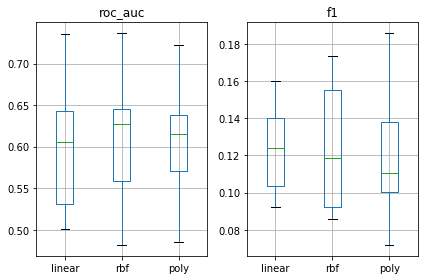

In [8]:
fig1, ax1 = plt.subplots(1, 2)
for n in range(0, len(kernels)):
    model = svm.SVC(kernel=kernels[n], class_weight='balanced')
    for m in range(0, len(metrics)):
        res = sklearn.model_selection.cross_val_score(
                model, Features, Y2, scoring=metrics[m], cv=10)
        plot1[m][kernels[n]] = res
ax1[0].set_title(metrics[0])
ax1[1].set_title(metrics[1])
roc_auc.boxplot(column=kernels, ax=ax1[0])
f1.boxplot(column=kernels, ax=ax1[1])
fig1.tight_layout()
plt.savefig('SVM_Kernel.png')
plt.show()

In [9]:
degrees = ['poly(1)', 'poly(2)', 'poly(3)', 'poly(4)']
metrics = ['roc_auc', 'f1']
roc_auc = pd.DataFrame(columns=degrees)
f1 = pd.DataFrame(columns=degrees)
plot2 = [roc_auc, f1]

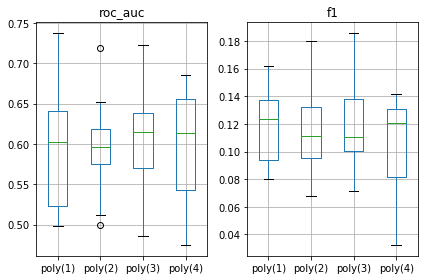

In [10]:
fig2, ax2 = plt.subplots(1, 2)
for n in range(0, len(degrees)):
    model = svm.SVC(kernel='poly', degree=(n+1), class_weight='balanced')
    for m in range(0, len(metrics)):
        res = sklearn.model_selection.cross_val_score(
                model, Features, Y2, scoring=metrics[m], cv=10)
        plot2[m][degrees[n]] = res
ax2[0].set_title(metrics[0])
ax2[1].set_title(metrics[1])
roc_auc.boxplot(column=degrees, ax=ax2[0])
f1.boxplot(column=degrees, ax=ax2[1])
fig2.tight_layout()
plt.savefig('SVM_Poly_Degree.png')
plt.show()

In [50]:
model = svm.SVC(kernel='poly',degree=3, class_weight='balanced')

In [12]:
metrics = ['f1', 'roc_auc', 'recall', 'precision']
f1 = []
roc_auc = []
recall = []
precision = []
plot3 = [f1, roc_auc, recall, precision]
for m in range(0, len(metrics)):
    out = plot3[m]
    for n in range(0, len(pca)):
        Set = Features[pca.index[0:n+1]]
        res = sklearn.model_selection.cross_val_score(
                model, Set, Y2, scoring=metrics[m], cv=10)
        out.append(np.mean(res))

C:\Users\femil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\femil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 864x576 with 0 Axes>

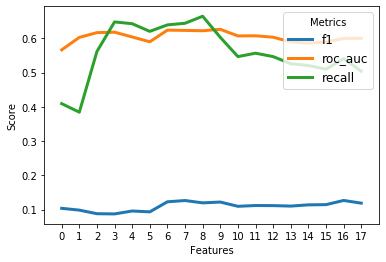

In [13]:
dict1 = {'f1':f1, 'roc_auc': roc_auc, 'recall':recall}
fig3 = plt.figure(num=3, figsize=(12, 8))
svm_metrics = pd.DataFrame(dict1)
ax3 = svm_metrics.plot(kind='line', linewidth=3)
ax3.set_xlim(-1, 18)
ax3.set_xticks(range(0, 18, 1))
ax3.set(ylabel="Score")
ax3.set(xlabel="Features")
plt.legend(loc='upper right', fontsize='large', title='Metrics', fancybox=True)
fig3.tight_layout()
plt.savefig('SVM_Poly3_Features.png')
plt.show()

In [14]:
chzn = pca.index[0:9]

In [15]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                                    Features, Y2, test_size=0.2, random_state=0)

In [16]:
y_pred = model.fit(X_train[chzn], y_train).predict(X_test[chzn])

In [17]:
y_score = model.decision_function(X_test[chzn])
sklearn.metrics.roc_auc_score(y_test, y_score)

0.6868131868131868

<Figure size 864x576 with 0 Axes>

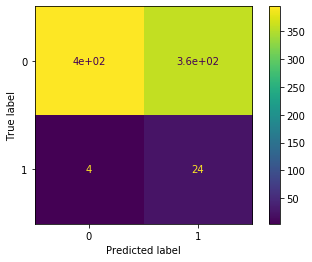

In [18]:
fig4 = plt.figure(num=4, figsize=(12, 8))
sklearn.metrics.plot_confusion_matrix(model, X_test[chzn], y_test)
fig4.tight_layout()
plt.savefig('SVM_ConfusionMatrix.png')
plt.show()

In [19]:
pca

danceability        0.053127
start               0.040258
CS                  0.031315
time_signature      0.030713
acousticness        0.030602
pitches             0.028226
explicit            0.027477
loudness            0.023717
Timbre              0.021078
energy              0.020829
mode                0.020575
instrumentalness    0.018406
speechiness         0.015372
valence             0.014377
tempo               0.013532
duration_ms         0.013129
liveness            0.010517
key                 0.000792
Name: Y2, dtype: float64

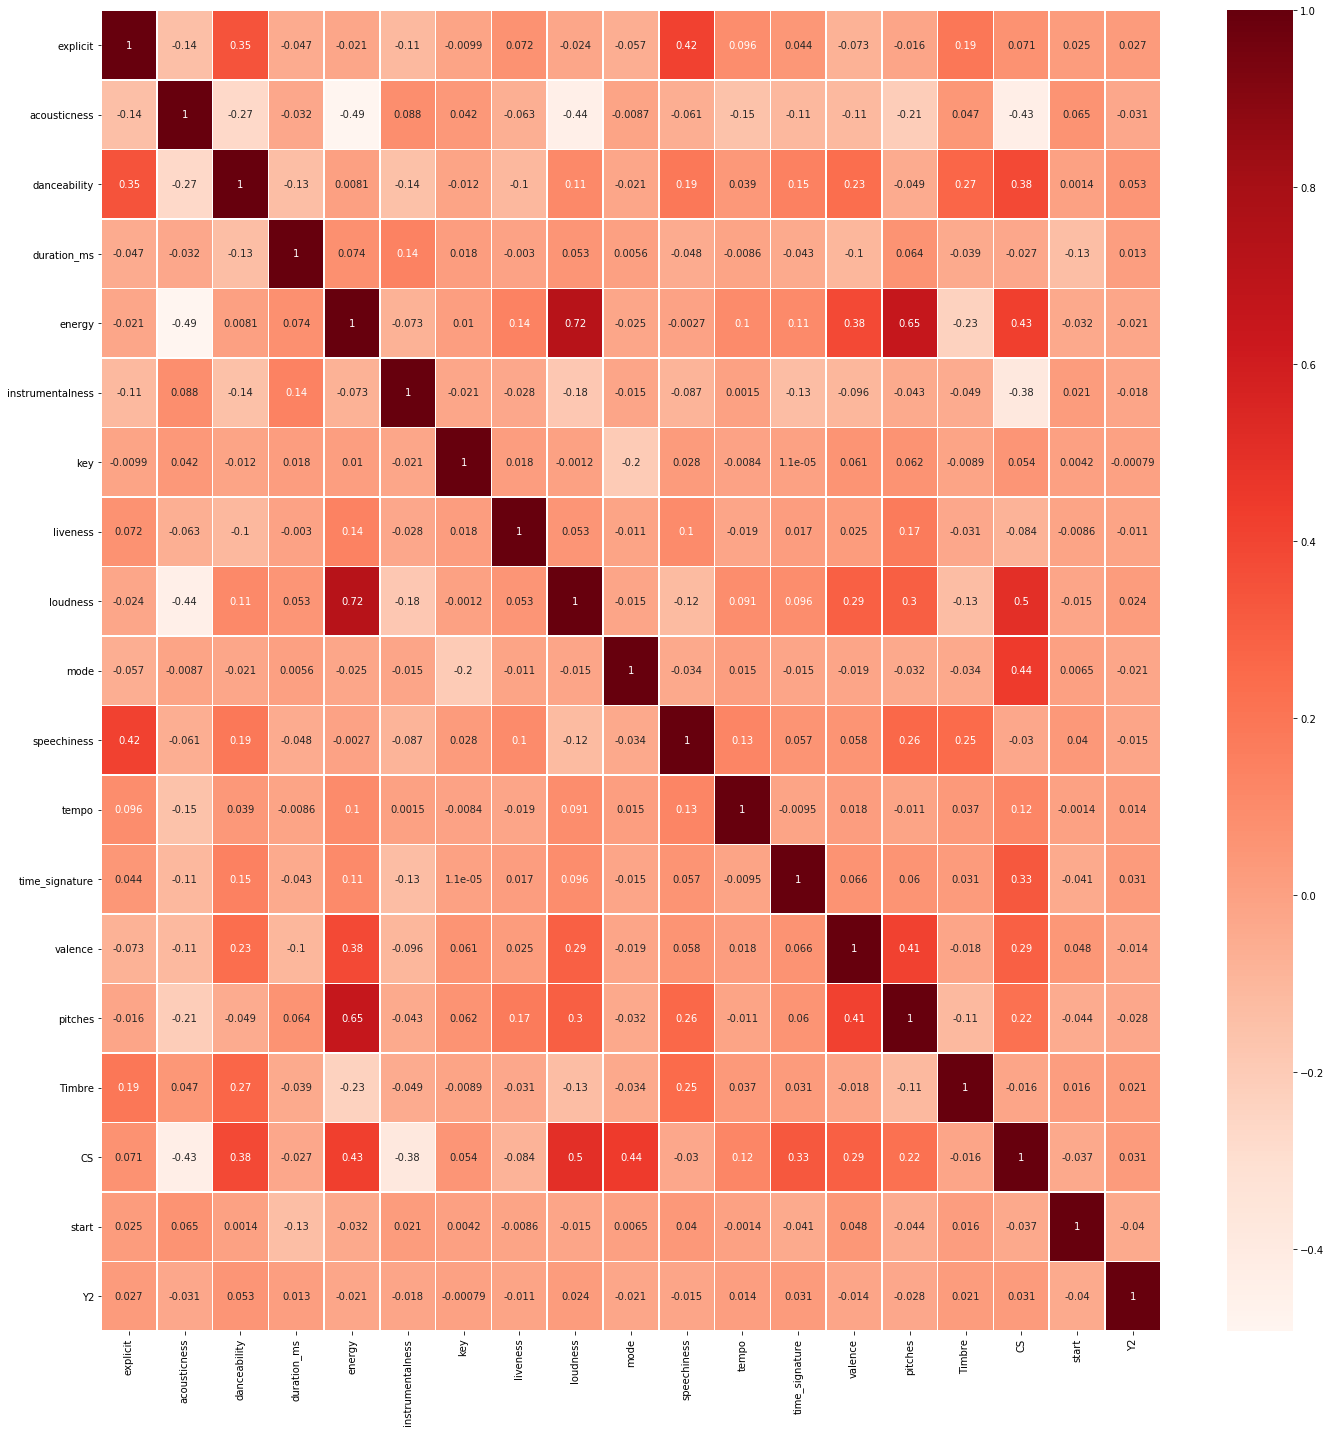

In [20]:
fig5 = plt.figure(num=5, figsize=(20, 20))
cor = Data_0.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=0.5)
plt.savefig('HeatMap.png')
plt.tight_layout()
plt.show()

In [21]:
pd.DataFrame(pca.index[0:9], columns=['Key Features'])

,Key Features
0,danceability
1,start
2,CS
3,time_signature
4,acousticness
5,pitches
6,explicit
7,loudness
8,Timbre


In [52]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier('stratified')

In [53]:
from scipy.stats import ttest_ind
mod = sklearn.model_selection.cross_val_score(model, Features[chzn], Y2, scoring='recall', cv=10)
dummy = sklearn.model_selection.cross_val_score(dum, Features[chzn], Y2, scoring='recall', cv=10)
recall_test = ttest_ind(mod, dummy)
print(recall_test)

Ttest_indResult(statistic=6.884016243537152, pvalue=1.9414855315338036e-06)


In [54]:
mod = sklearn.model_selection.cross_val_score(model, Features[chzn], Y2, scoring='roc_auc', cv=10)
dummy = sklearn.model_selection.cross_val_score(dum, Features[chzn], Y2, scoring='roc_auc', cv=10)
roc_auc_test = ttest_ind(mod, dummy)
print(roc_auc_test)

Ttest_indResult(statistic=3.713010107852722, pvalue=0.001591857056956324)


In [55]:
mod = sklearn.model_selection.cross_val_score(model, Features[chzn], Y2, scoring='f1', cv=10)
dummy = sklearn.model_selection.cross_val_score(dum, Features[chzn], Y2, scoring='f1', cv=10)
f1_test = ttest_ind(mod, dummy)
print(f1_test)

Ttest_indResult(statistic=4.360544275860434, pvalue=0.0003769817930756155)
